# Продуктовая аналитика

## Практическое задание 1

### Общая информация
Дата выдачи: XX.02.2024

Мягкий дедлайн: 23:59MSK XX.XX.2024

Жесткий дедлайн: 23:59MSK XX.XX.2024

### О задании
В этом задании вам предстоит приобрести (или освежить) навыки предварительного анализа данных, которые пригождаются продуктовым аналитикам чуть ли не ежедневно.

Вы также познакомитесь с разными библиотеками визуализации и модулем `scipy.stats`!

### Подключение библиотек

In [ ]:
# установите все зависимости
!pip install folium scipy numpy pandas seaborn matplotlib statsmodels

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import statsmodels as sm

import matplotlib.pyplot as plt
import seaborn as sns
import folium

from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# распакуйте архив с данными
!unzip airbnb_listings.zip

Archive:  airbnb_listings.zip
   creating: airbnb_listings/
  inflating: airbnb_listings/berlin_weekdays.csv  
  inflating: airbnb_listings/london_weekdays.csv  
  inflating: airbnb_listings/amsterdam_weekdays.csv  
  inflating: airbnb_listings/berlin_weekends.csv  
  inflating: airbnb_listings/london_weekends.csv  
  inflating: airbnb_listings/paris_weekdays.csv  
  inflating: airbnb_listings/amsterdam_weekends.csv  
  inflating: airbnb_listings/paris_weekends.csv  


## Часть 1. Графики и статистики

Мы будем работать с [предложениями аренды в сервисе Airbnb](https://zenodo.org/records/4446043#.ZEV8d-) в городах Европы - сегодня это Амстердам, Лондон, Париж и Берлин. Архив с файлами приложен к домашнему заданию, а структуру таблиц и значение каждой из колонок можно почитать в первоисточнике.

**Airbnb** - это маркетплейс с предложениями посуточной аренды для туристических и деловых поездок, который соединяет арендатора и арендодателя. Вам предстоит изучить, как устроено ценообразование на этом маркетплейсе.

**Задание 1 (0.5 балла).**

Считайте данные из папки *airbnb_listings* и объедините их в один *pd.Dataframe*.

*Совет: не забудьте сохранить информацию о городе и другие полезные знания из названий файлов.*

In [ ]:
filepaths = list([str(p) for p in Path('airbnb_listings').glob('*')])
filepaths

['airbnb_listings/amsterdam_weekdays.csv',
 'airbnb_listings/london_weekdays.csv',
 'airbnb_listings/paris_weekends.csv',
 'airbnb_listings/amsterdam_weekends.csv',
 'airbnb_listings/paris_weekdays.csv',
 'airbnb_listings/berlin_weekends.csv',
 'airbnb_listings/london_weekends.csv',
 'airbnb_listings/berlin_weekdays.csv']

In [ ]:
dfs = list()
for i, f in enumerate(filepaths):
    file = pd.read_csv(f)
    file['file'] = f'File {i}'
    dfs.append(file)
data = pd.concat(dfs, ignore_index=True)
data

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,file
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,File 0
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,File 0
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,File 0
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,File 0
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,File 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,1279,232.074413,Private room,False,True,2.0,False,1,0,10.0,...,1,3.482221,0.509602,91.587227,13.964286,122.168375,25.190282,13.45614,52.50351,File 7
21241,1280,175.049079,Entire home/apt,False,False,2.0,False,0,0,10.0,...,1,11.002848,2.377031,34.425382,5.248831,44.454457,9.166205,13.50477,52.44047,File 7
21242,1281,158.689352,Entire home/apt,False,False,2.0,False,0,0,9.0,...,1,11.313156,2.531878,33.429196,5.096943,43.200491,8.907645,13.51031,52.43937,File 7
21243,1282,134.617182,Private room,False,True,4.0,False,1,0,10.0,...,1,15.166191,2.754843,25.439056,3.878688,33.027075,6.809957,13.53301,52.40712,File 7


In [ ]:
data.replace(['File 0', 'File 1', 'File 2', 'File 3', 'File 4', 'File 5', 'File 6', 'File 7'],
 ['Amsterdam, weekdays', 'London, weekdays', 'Paris, weekends', 'Amsterdam, weekends', 'Paris, weekdays',
  'Berlin, weekends', 'London, weekends', 'Berlin, weekdays'], inplace = True)
data[['city', 'week_part']] = data['file']. str.split(', ', 2, expand= True )

data.drop('file', axis = 1, inplace = True)
data



,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week_part
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,1279,232.074413,Private room,False,True,2.0,False,1,0,10.0,...,3.482221,0.509602,91.587227,13.964286,122.168375,25.190282,13.45614,52.50351,Berlin,weekdays
21241,1280,175.049079,Entire home/apt,False,False,2.0,False,0,0,10.0,...,11.002848,2.377031,34.425382,5.248831,44.454457,9.166205,13.50477,52.44047,Berlin,weekdays
21242,1281,158.689352,Entire home/apt,False,False,2.0,False,0,0,9.0,...,11.313156,2.531878,33.429196,5.096943,43.200491,8.907645,13.51031,52.43937,Berlin,weekdays
21243,1282,134.617182,Private room,False,True,4.0,False,1,0,10.0,...,15.166191,2.754843,25.439056,3.878688,33.027075,6.809957,13.53301,52.40712,Berlin,weekdays


Колонки *multi*, *biz*, *room_shared* и *room_private* дублируют информацию из других колонок - удалим их.

In [ ]:
data.drop(columns=['multi', 'biz', 'room_shared', 'room_private'], inplace=True)
data

,Unnamed: 0,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week_part
0,0,194.033698,Private room,2.0,False,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekdays
1,1,344.245776,Private room,4.0,False,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekdays
2,2,264.101422,Private room,2.0,False,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekdays
3,3,433.529398,Private room,4.0,False,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekdays
4,4,485.552926,Private room,2.0,True,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,1279,232.074413,Private room,2.0,False,10.0,96.0,1,3.482221,0.509602,91.587227,13.964286,122.168375,25.190282,13.45614,52.50351,Berlin,weekdays
21241,1280,175.049079,Entire home/apt,2.0,False,10.0,100.0,1,11.002848,2.377031,34.425382,5.248831,44.454457,9.166205,13.50477,52.44047,Berlin,weekdays
21242,1281,158.689352,Entire home/apt,2.0,False,9.0,91.0,1,11.313156,2.531878,33.429196,5.096943,43.200491,8.907645,13.51031,52.43937,Berlin,weekdays
21243,1282,134.617182,Private room,4.0,False,10.0,93.0,1,15.166191,2.754843,25.439056,3.878688,33.027075,6.809957,13.53301,52.40712,Berlin,weekdays


**Задание 2 (0.5 балл).**
Посмотрим на датасеты!

В данных есть категориальные переменные - те, в которых присутствует конечное множество значений.
Выберите категориальные переменные из всех и задайте им тип **category**.

**realSum:** the full price of accommodation for two people and two nights in EUR

**room_type:** the type of the accommodation


**person_capacity:** the maximum number of guests

**host_is_superhost:** dummy variable for superhost status


**cleanliness_rating:** cleanliness rating

**guest_satisfaction_overall:** overall rating of the listing

**bedrooms:** number of bedrooms (0 for studios)

**dist:** distance from city centre in km

**metro_dist:** distance from nearest metro station in km

**attr_index:** attraction index of the listing location

**attr_index_norm:** normalised attraction index (0-100)

**rest_index:** restaurant index of the listing location

**attr_index_norm:** normalised restaurant index (0-100)

**lng:** longitude of the listing location

**lat:** latitude of the listing location

In [ ]:
data.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
person_capacity               float64
host_is_superhost                bool
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
week_part                      object
dtype: object

In [ ]:
# Посмотрим, какие уникальные значения есть у наших переменных, чтобы определить, какие из них имеют конечное количество значений
# Проверяем, нет ли проблем с записями данных
unique_values = {}

for column in data.columns:
    unique_values[column] = data[column].unique()

unique_values

{'Unnamed: 0': array([   0,    1,    2, ..., 5376, 5377, 5378]),
 'realSum': array([194.03369812, 344.24577602, 264.10142245, ..., 382.81761241,
        110.07759185, 158.68935215]),
 'room_type': array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object),
 'person_capacity': array([2., 4., 3., 6., 5.]),
 'host_is_superhost': array([False,  True]),
 'cleanliness_rating': array([10.,  8.,  9.,  6.,  7.,  5.,  4.,  2.,  3.]),
 'guest_satisfaction_overall': array([ 93.,  85.,  87.,  90.,  98., 100.,  94.,  96.,  88.,  97.,  95.,
         89.,  91.,  84.,  77.,  99.,  80.,  92.,  82.,  78.,  86.,  74.,
         81.,  83.,  73.,  76.,  75.,  70.,  65.,  47.,  60.,  20.,  79.,
         71.,  40.,  63.,  72.,  68.,  67.,  50.,  69.,  30.,  64.,  53.,
         46.,  57.,  55.,  56.,  66.,  62.,  61.]),
 'bedrooms': array([1, 2, 3, 0, 5, 4, 8, 9]),
 'dist': array([ 5.0229638 ,  0.48838929,  5.74831192, ..., 11.31315552,
        15.16619107, 22.61745145]),
 'metro_dist': array([ 2.5

In [ ]:
# Выбрали категориальные переменные
categorical_columns = ['room_type', 'host_is_superhost', 'city', 'bedrooms', 'person_capacity', 'cleanliness_rating', 'week_part']
# Все остальные занесли в список количественных переменных
numerical_columns = data.drop(categorical_columns, axis = 1).columns.to_list()

In [ ]:
# Приводим к типу float количественные переменные, чтобы в дальнейшем было удобно с ними работать
for col in numerical_columns:
    data[col] = data[col].astype(float)

# Категориальным переменным присваиваем тип category
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [ ]:
data.dtypes

Unnamed: 0                     float64
realSum                        float64
room_type                     category
person_capacity               category
host_is_superhost             category
cleanliness_rating            category
guest_satisfaction_overall     float64
bedrooms                      category
dist                           float64
metro_dist                     float64
attr_index                     float64
attr_index_norm                float64
rest_index                     float64
rest_index_norm                float64
lng                            float64
lat                            float64
city                          category
week_part                     category
dtype: object

In [ ]:
# проверим, что ни одна переменная не потерялась
len(numerical_columns) + len(categorical_columns)

18

In [ ]:
len(data.columns)

18

**Вопрос:** всем ли колонкам можно однозначно определить тип? Когда может быть важно рассматривать, как их рассматривать?

**Ответ:** Не всем колонкам можно однозначно определить тип, например, переменные bedrooms и person_capacity выглядят как количественные, но в местах для размещения их значения фиксированы, не может быть 15 или 1.5 спален, или в квартиру/комнату не могут заселить больше человек, чем указанная хозяином вместимость, поэтому более логично сделать эти переменные категориальными. Также cleanliness_rating тоже выглядит как количественная переменная, но содержит конечное число целых значений только от 1 до 10.

Как их рассматривать может быть важно при обработке данных (пропуски в категориальных некорректно заполнять средними и тд, их лучше просто удалять, в то время как пропущенные значения в количественных переменных восстанавливаются чаще всего методом "Импутация среднего, или наиболее ожидаемого значения").

Также для категориальных нельзя посчитать различные статистики, кроме моды.

При создании дамми-переменных, применяемых в моделях, тип данных сильно влияет на кодировку и результат: количественные переменные не изменяются, категориальные разбиваются на дамми.

**Задание 3 (1 балл).**

Для категориальных переменных посчитайте частоты каждого значения и постройте гистограммы.
- Для подсчета частот воспользуйтесь [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) или [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html).
- Постарайтесь подсчитать и сохранить частоты в какой-либо структуре данных - они вам еще пригодятся.
- Для построения гистограмм воспользуйтесь [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) или [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
- Экспериментируйте!

In [ ]:
values = {}
for col in categorical_columns:
  values[col] = data[col].value_counts()
values

{'room_type': Entire home/apt    11459
 Private room        9559
 Shared room          227
 Name: room_type, dtype: int64,
 'host_is_superhost': False    17501
 True      3744
 Name: host_is_superhost, dtype: int64,
 'city': London       9993
 Paris        6688
 Berlin       2484
 Amsterdam    2080
 Name: city, dtype: int64,
 'bedrooms': 1    15357
 2     2900
 0     2361
 3      559
 4       55
 5        9
 8        2
 9        2
 Name: bedrooms, dtype: int64,
 'person_capacity': 2.0    12691
 4.0     4542
 3.0     1997
 6.0     1259
 5.0      756
 Name: person_capacity, dtype: int64,
 'cleanliness_rating': 10.0    11143
 9.0      6660
 8.0      2358
 7.0       605
 6.0       277
 4.0        87
 2.0        71
 5.0        40
 3.0         4
 Name: cleanliness_rating, dtype: int64,
 'week_part': weekends    11114
 weekdays    10131
 Name: week_part, dtype: int64}

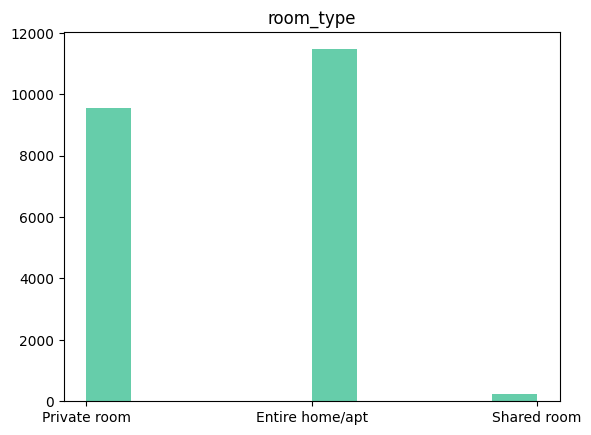

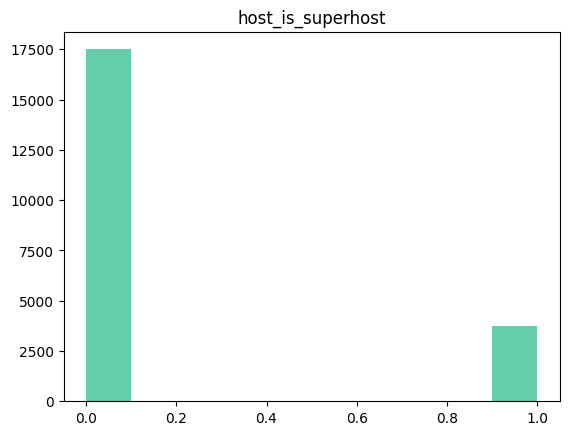

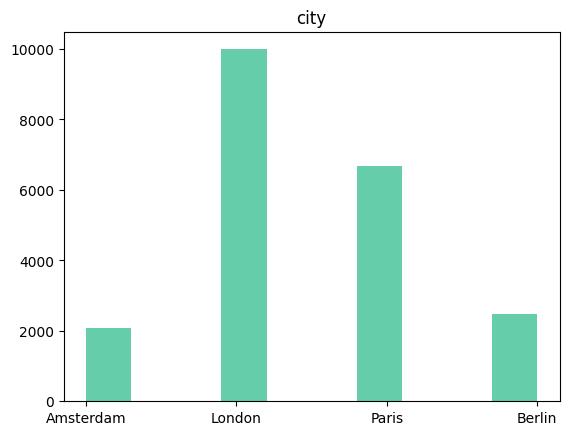

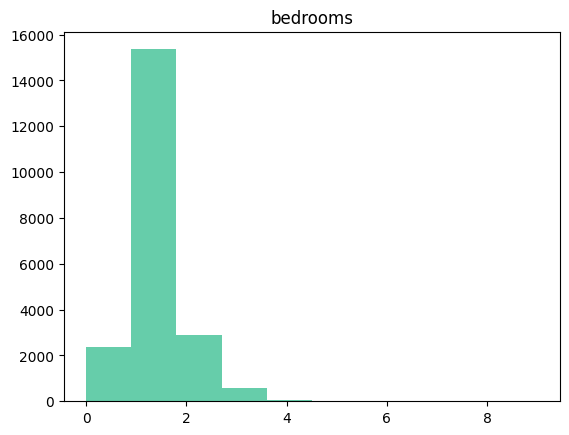

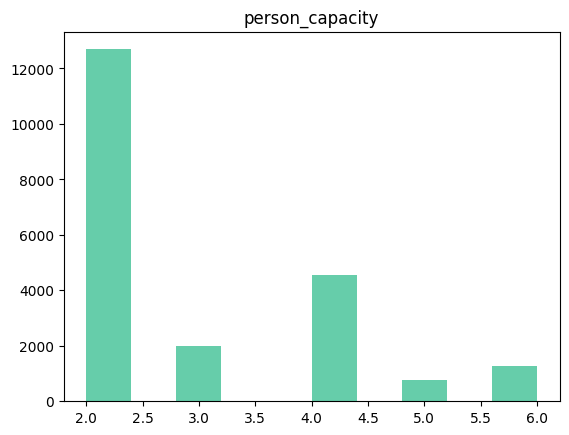

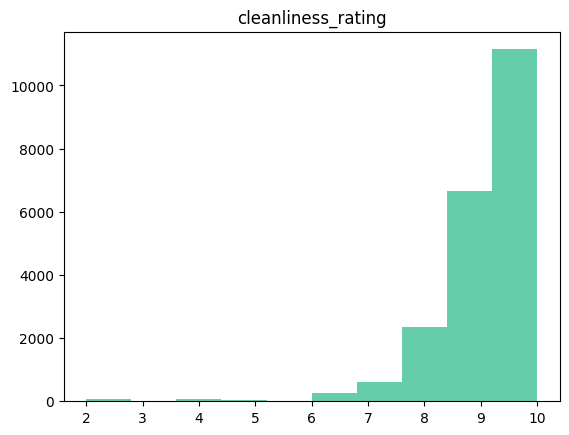

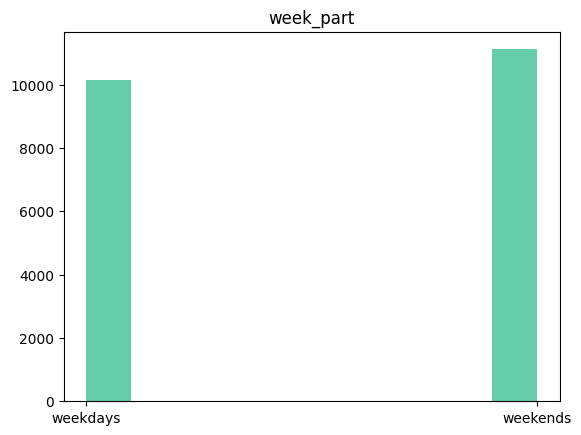

In [ ]:
data['host_is_superhost'] = data['host_is_superhost'].astype(int)
# Если этого не сделать, выдает ошибку при построении гистограммы, так как не обрабатывается буллевое значение (несмотря на то, что меняли до этого тип данных)
for column in categorical_columns:
    plt.figure()
    plt.hist(data[column], color = 'mediumaquamarine')
    plt.title(column)
    plt.show()

Для удобства интерпретации построили также круговые диаграммы.

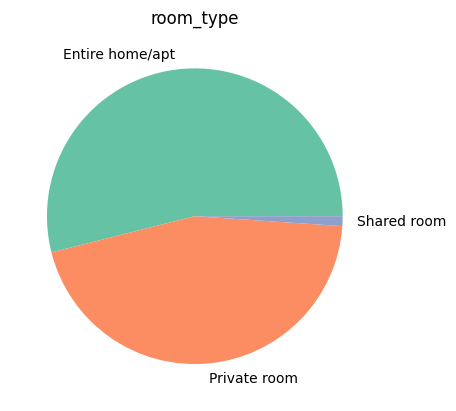

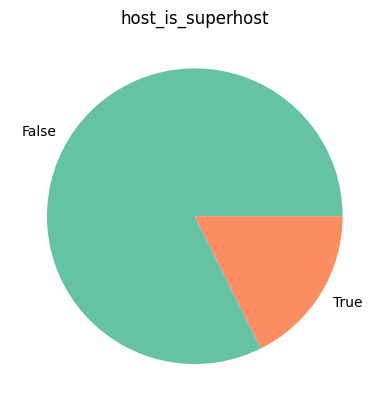

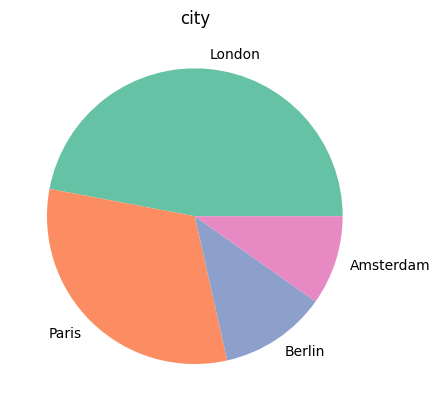

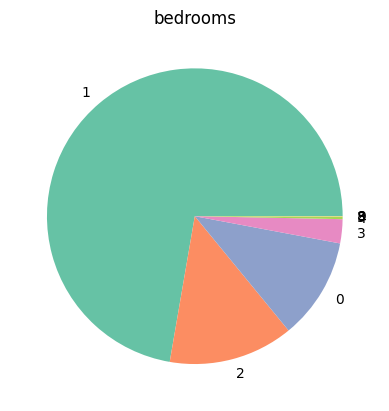

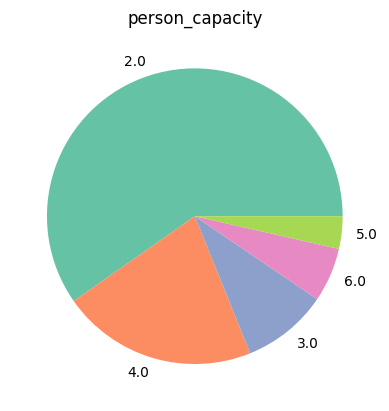

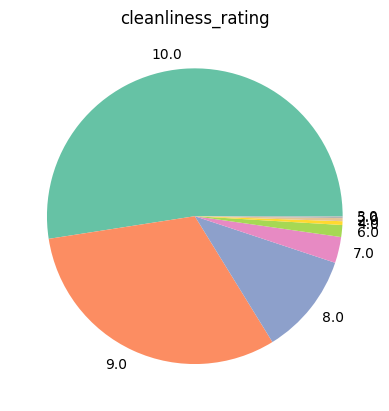

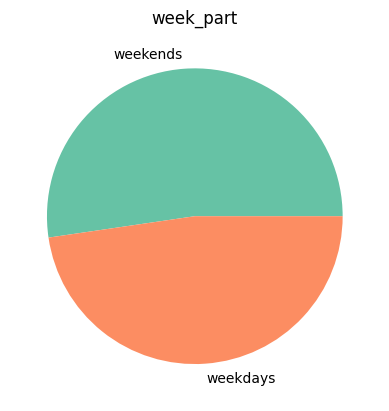

In [ ]:
for key in values.keys():
    plt.figure()
    plt.pie(values[key], labels = values[key].index, colors=sns.color_palette('Set2'))
    plt.title(key)
    plt.show()

**Выводы по графикам:**

* У переменной room_type наблюдается дисбаланс классов: доля значений shared room крайне мала;

* Доля суперхозяев существенно ниже доли обычных хозяев;

* Наиболее часто встречающийся город в данных - это Амстердам;

* Больше всего предложений с 1 одной спальней. Также в топ-3 входят квартиры с 2 спальнями или студии. Более просторное жилье с кличеством спален 3+ встречается редко;

* Чаще всего жилье сдается для 2-х человек, на 2-м месте по частоте - бронирование на 4 людей;

* По распределению значений рейтинга чистоты видим, что большинство мест получает отличные оценки, хорошие и плохие оценки (от 7 и ниже) встречаются крайне редко;

* Бронирование по выходным и в будни распределено практически равномерно.


Кажется, для колонок *bedrooms* и *room_type* некоторые группы имеют очень мало примеров - менее пяти процентов. К нашему счастью, можно объединить эти значения в группы покрупнее, при этом сохранив "физический смысл".

Так, для типов размещения "общая комната" и "личная комната" логично объединить их в тип "комната".
Проведите укрупнение колонки *room_type* и любой другой категориальной, опишите, почему вы выбрали именно такую группировку.

*Подсказка:* почитайте про колонку и возможные значения в первоисточнике. А еще воспользуйтесь классом *Mapper* - он может помочь вам писать меньше дублирующегося кода.


In [ ]:
class Mapper(dict):
    def __init__(self, default):
      super().__init__()
      self.default = default

    def __missing__(self, key):
      return self.default


mapper = Mapper(default='room')
mapper |= {'Private room': 'room', 'Entire home/apt': 'entire home/apt'}

data['room_type'] = data['room_type'].map(mapper).astype('category')
data['room_type'].value_counts()

entire home/apt    11459
room                9786
Name: room_type, dtype: int64

Видим, что количество спален, начиная с 3-х, встречается крайне редко. Можно объединить категории в одну "3 и более" для удобства интерпретации. По логике, места, где спален больше 3-х, можно назвать просторными или на большую компанию.

In [ ]:
data['bedrooms'].value_counts()

1    15357
2     2900
0     2361
3      559
4       55
5        9
8        2
9        2
Name: bedrooms, dtype: int64

In [ ]:
data['bedrooms'].replace([3, 4, 5, 8, 9], '3 и более', inplace = True)
data['bedrooms'].value_counts()

1            15357
2             2900
0             2361
3 и более      627
Name: bedrooms, dtype: int64

В переменной cleanliness_rating видим, что рейтинг ниже 7 встречается гораздо реже отличных оценок. Объединим эти значения в одну, так как, если на рынке представлено много разных мест с отличными оценками, "7 и ниже" будет свидетельствовать об имеющихся проблемах и неконкурентоспособности.

In [ ]:
data['cleanliness_rating'].value_counts()

10.0    11143
9.0      6660
8.0      2358
7.0       605
6.0       277
4.0        87
2.0        71
5.0        40
3.0         4
Name: cleanliness_rating, dtype: int64

In [ ]:
data['cleanliness_rating'].replace([7, 6, 4, 2, 5, 3], '7 и ниже', inplace = True)
data['cleanliness_rating'].value_counts()

10.0        11143
9.0          6660
8.0          2358
7 и ниже     1084
Name: cleanliness_rating, dtype: int64

In [ ]:
changed_categories = ['room_type', 'bedrooms', 'cleanliness_rating']

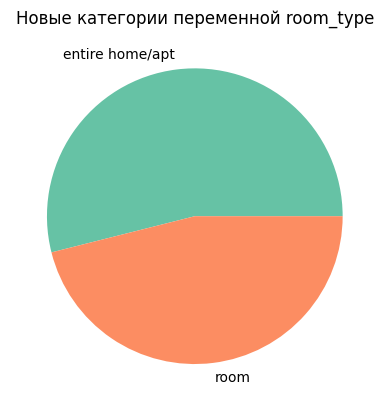

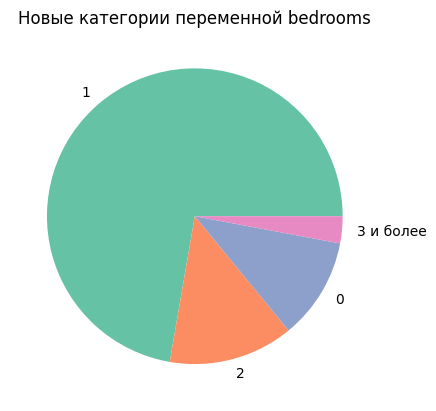

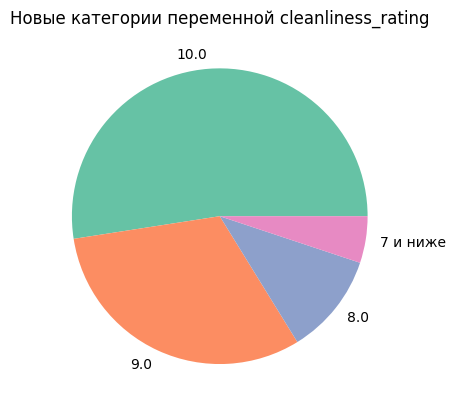

In [ ]:
for category in changed_categories:
  plt.figure()
  plt.pie(data[category].value_counts(), labels = data[category].value_counts().index, colors=sns.color_palette('Set2'))
  plt.title(f'Новые категории переменной {category}');

Объединили некоторые значения для 3-х категориальных переменных, теперь классы распределены более равномерно, что позволит избежать части проблем при дальнейшей работе.

**Задание 4 (1 балл).**

Для цены (колонка **realSum**) рассчитайте описательные статистики:
  - среднее, медиана;
  - квартили и межквартильный размах;
  - стандартное отклонение;
  - минимум, максимум;
  - перекос (skew), эксцесс (curtosis);

In [ ]:
def get_statistics(x: pd.Series):
    mean = x.mean()
    std = x.std()
    median = x.median()
    min = x.min()
    max = x.max()
    quantile = x.quantile([0.25, 0.5, 0.75])
    iqr = x.quantile(0.75) - x.quantile(0.25)
    skew = sps.skew(x, bias = True)
    kurtosis = sps.kurtosis(x, bias = True)

    # YOUR CODE HERE ¯\_(ツ)_/¯

    return {
        'mean': mean,
        'std': std,
        'median': median,
        'min': min,
        'max': max,
        'quantile': quantile,
        'iqr': iqr,
        'skew': skew,
        'kurtosis': kurtosis


    }

statistics = pd.Series(get_statistics(data['realSum']))
statistics

mean                                               378.772697
std                                                411.809812
median                                             289.988005
min                                                 54.328653
max                                              16445.614689
quantile    0.25    193.560526
0.50    289.988005
0.75    ...
iqr                                                258.718344
skew                                                15.720408
kurtosis                                           452.362829
dtype: object

Сделайте это для всех числовых переменных:

In [ ]:
statistics = {}
for column in numerical_columns:
  statistics[column] = (get_statistics(data[column]))
  print('\t \t \t', column, '\n', pd.Series(get_statistics(data[column])), '\n')


	 	 	 Unnamed: 0 
 mean                                              1833.783243
std                                               1379.280519
median                                                 1514.0
min                                                       0.0
max                                                    5378.0
quantile    0.25     663.0
0.50    1514.0
0.75    2842.0
N...
iqr                                                    2179.0
skew                                                 0.626751
kurtosis                                            -0.633363
dtype: object 

	 	 	 realSum 
 mean                                               378.772697
std                                                411.809812
median                                             289.988005
min                                                 54.328653
max                                              16445.614689
quantile    0.25    193.560526
0.50    289.988005
0.75    ...
iqr                

**Вопрос:** для всех ли переменных распределение несет какой-то смысл? Почему да / нет?

**Ответ:**

* Переменная Unnamed вообще странная, но не стала ее убирать, вдруг за что-то важное отвечает;

* Для переменных lat и lng распределение не несет никакого смысла, так как они отвечают за конкретные координаты. Если мы посчитаем, например, медиану для этих чисел, то никакой полезной информации не получим, потому что она просто покажет нам другую точку мира.

**Задание 5 (0.5 балл).**

Распределение широты и долготы - это малополезная информация. Давайте лучше визуализируем информацию о местоположении так, как мы привыкли её видеть - например, при помощи карты. С этим нам поможет библиотека **folium**.

Постройте хитмап (тепловую диаграмму) бронирований для одного из городов.

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
center_coordinates = [52.5244, 13.4105] #https://time-in.ru/coordinates/berlin Координаты центра Берлина

In [ ]:
#https://stackoverflow.com/questions/61301081/folium-heatmaps
lat = data[data['city'] == 'Berlin']['lat'].to_list()
lng = data[data['city'] == 'Berlin']['lng'].to_list()
map = folium.Map(
    location=center_coordinates,
    tiles='cartodbdark_matter',
    zoom_start=10
)
HeatMap(list(zip(lat, lng))).add_to(map)
map

Геоданные, такие как координаты, могут быть очень полезны в исследованиях, но сегодня мы остановимся на этой карте и использовании двух переменных, которые уже были рассчитаны для нас - расстоянии до центра города и расстоянии до ближайшей станции метро.

## Часть 2. Связь цены и других факторов

**Задание 6 (1 балл).**

Посмотрим, как зависит цена от других переменных.
Для колонок *dist* и *metro_dist* и цены бронирования постройте диаграммы рассеяния.

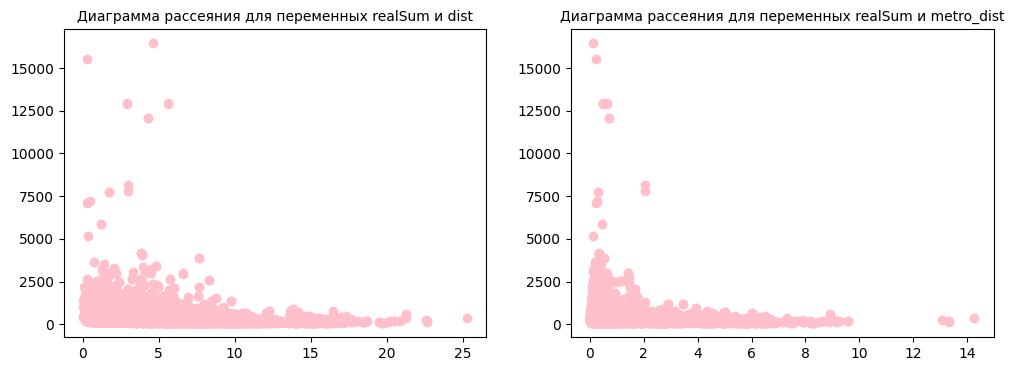

In [ ]:
dist_cols = ['dist', 'metro_dist']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].scatter(data['dist'], data['realSum'], color = 'pink')
axs[0].set_title('Диаграмма рассеяния для переменных realSum и dist', fontsize = 10)
axs[1].scatter(data['metro_dist'], data['realSum'], color = 'pink')
axs[1].set_title('Диаграмма рассеяния для переменных realSum и metro_dist', fontsize = 10)


plt.show()

Что-то наши графики слегка *прижало* из-за очень больших и редких значений цены. Давайте отфильтруем выбросы по правилу "трех сигм" и построим эти графики еще раз.

*Подсказка:* вам пригодятся описательные статистики, которые вы считали ранее.

In [ ]:
threshold = 3

lower_bound = statistics['realSum']['mean'] - threshold * statistics['realSum']['std']
upper_bound = statistics['realSum']['mean'] + threshold * statistics['realSum']['std']

# Фильтрация значений по правилу трех сигм
filtered_data = data[(data['realSum'] >= lower_bound) & (data['realSum'] <= upper_bound)]
filtered_data

,Unnamed: 0,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week_part
0,0.0,194.033698,room,2.0,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekdays
1,1.0,344.245776,room,4.0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekdays
2,2.0,264.101422,room,2.0,0,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekdays
3,3.0,433.529398,room,4.0,0,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekdays
4,4.0,485.552926,room,2.0,1,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,1279.0,232.074413,room,2.0,0,10.0,96.0,1,3.482221,0.509602,91.587227,13.964286,122.168375,25.190282,13.45614,52.50351,Berlin,weekdays
21241,1280.0,175.049079,entire home/apt,2.0,0,10.0,100.0,1,11.002848,2.377031,34.425382,5.248831,44.454457,9.166205,13.50477,52.44047,Berlin,weekdays
21242,1281.0,158.689352,entire home/apt,2.0,0,9.0,91.0,1,11.313156,2.531878,33.429196,5.096943,43.200491,8.907645,13.51031,52.43937,Berlin,weekdays
21243,1282.0,134.617182,room,4.0,0,10.0,93.0,1,15.166191,2.754843,25.439056,3.878688,33.027075,6.809957,13.53301,52.40712,Berlin,weekdays


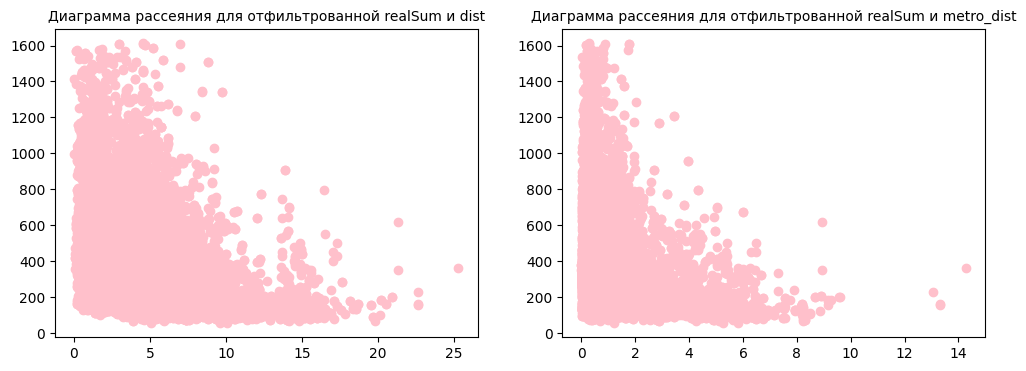

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].scatter(filtered_data['dist'], filtered_data['realSum'], color = 'pink')
axs[0].set_title('Диаграмма рассеяния для отфильтрованной realSum и dist', fontsize = 10)
axs[1].scatter(filtered_data['metro_dist'], filtered_data['realSum'], color = 'pink')
axs[1].set_title('Диаграмма рассеяния для отфильтрованной realSum и metro_dist', fontsize = 10)

plt.show()

**Вопрос:** есть ли зависимость между этими переменными и ценой? Чем её можно объяснить?

*Подсказка:* подумайте про транспортную доступность.

**Ответ:** Можем наблюдать отрицательную корреляцию между ценой бронирования и расстояниями до метро и до центра. Чем больше расстояния, тем больше времени и средств придется тратить на дорогу, что существенно снижает, во-первых, желание снимать жилье в удаленной локации, во-вторых, сумму, которую турист готов потратить на бронирование. Ведь если он живет далеко от метро или от центра, где, в основном, находится большинство ключевых достопримечательностей, то ему приходится либо очень много ходить пешком (что может быть физически тяжело), либо пользоваться услугами такси (дорогими в центрах городов, существенная часть расходов), либо разбираться с общественным транспортом, который может показаться достаточно сложно устроенным для непривыкшего человека. Эти факторы отрицательно влияют на спрос на квартиры в удаленных локациях, что негативно сказывается на цене.

**Задание 7 (1 балл).**

Давайте формализуем наши выводы из прошлого задания - посчитайте коэффициент корреляции этих переменных и цены, а также проверьте статистическую значимость.

Воспользуйтесь одним из коэффициентов из *scipy.stats* (и аргументируйте свой выбор), например:
- [Кендалла-Тау](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)
- [Пирсона](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
- [Спирмана](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

Согласуется ли результат с вашими выводами?


Для начала проверяем данные на нормальность

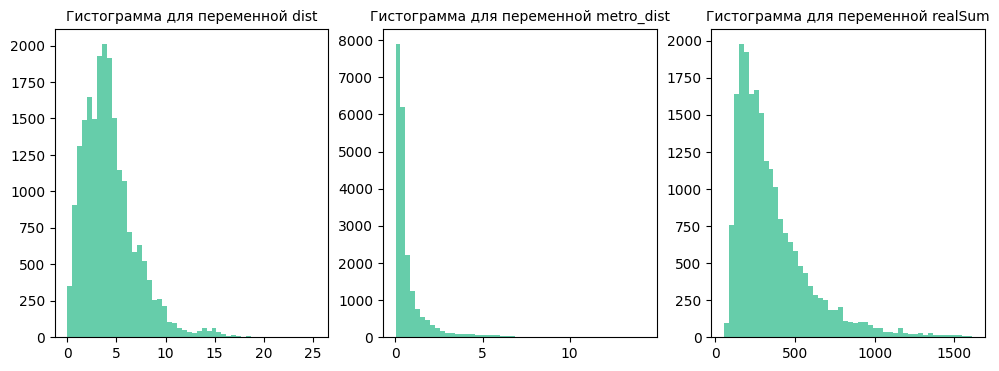

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
axs[0].hist(filtered_data['dist'], bins = 50, color = 'mediumaquamarine')
axs[0].set_title('Гистограмма для переменной dist', fontsize = 10)
axs[1].hist(filtered_data['metro_dist'], bins = 50, color = 'mediumaquamarine')
axs[1].set_title('Гистограмма для переменной metro_dist', fontsize = 10)
axs[2].hist(filtered_data['realSum'], bins = 50, color = 'mediumaquamarine')
axs[2].set_title('Гистограмма для переменной realSum', fontsize = 10)



plt.show()

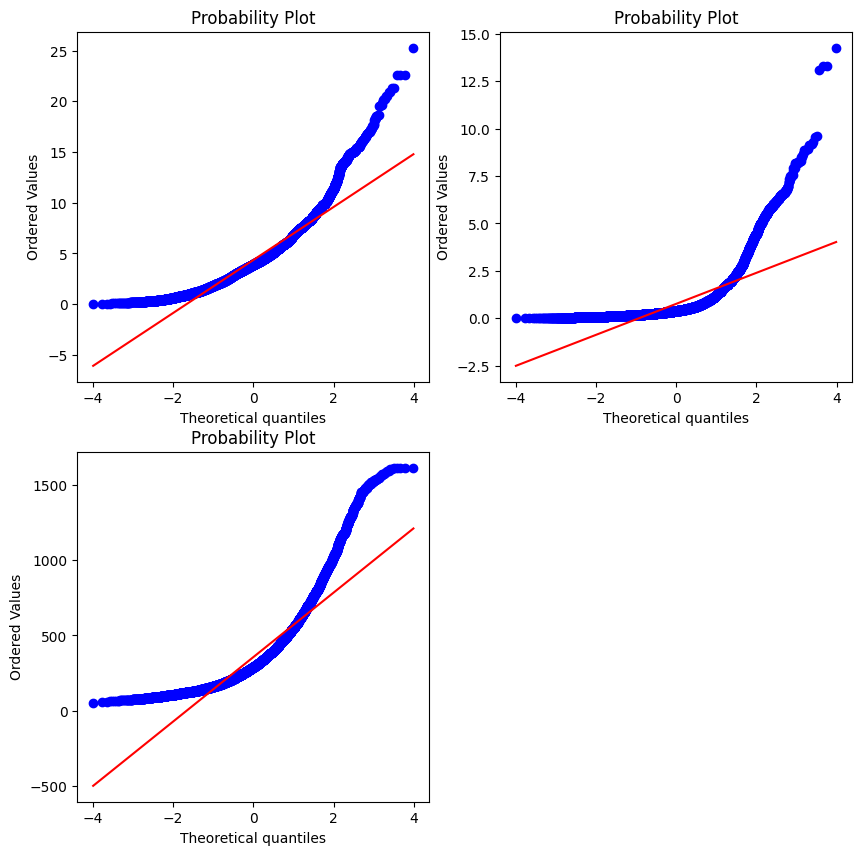

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 10))
axs[0] = plt.subplot(221)
sps.probplot(filtered_data['dist'], dist = "norm", plot = axs[0])
axs[1] = plt.subplot(222)
sps.probplot(filtered_data['metro_dist'], dist = "norm", plot = axs[1])
axs[2] = plt.subplot(223)
sps.probplot(filtered_data['realSum'], dist = "norm", plot = axs[2]);

In [ ]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % sps.shapiro(filtered_data['dist']))

Shapiro-Wilk normality test, W-statistic: 0.907643, p-value: 0.000000


In [ ]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % sps.shapiro(filtered_data['metro_dist']))

Shapiro-Wilk normality test, W-statistic: 0.583255, p-value: 0.000000


In [ ]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % sps.shapiro(filtered_data['metro_dist']))

Shapiro-Wilk normality test, W-statistic: 0.583255, p-value: 0.000000


Значение p-value близко к 0 => при любом разумном уровне значимости нулевая гипотеза о нормальности распределения значений выбранных переменных отвергается.

Результаты тестов можно увидеть и на графиках: на гистограммах видим перекос значений, нехарактерный для "колокола" (больше похоже на распределение Хи-квадрат), на графике нормальной вероятности видим существенные отклонения.

Видим, что данные распределены не нормально => применять коэффициент корреляции Пирсона некорректно.
Для исследования корреляции между переменными рассчитаем коэффициент Кендалла, так как он считается более "содержательным" ввиду того, что перебирает все возможные соответствия между парами значений, более полно и детально анализируя возможные связи.

In [ ]:
sps.kendalltau(filtered_data['dist'], filtered_data['realSum'])

SignificanceResult(statistic=-0.27801674311133245, pvalue=0.0)

In [ ]:
sps.kendalltau(filtered_data['metro_dist'], filtered_data['realSum'])

SignificanceResult(statistic=-0.14989903446245365, pvalue=2.2390025088442554e-233)

* p-value стремится к 0 => при любом разумном уровне значимости статзначим;
* Видим отрицательную корреляцию между переменными realSum и dist, metro_dist. Тестами подтвердили предыдущие графические результаты.







**Задание 8 (1 балл).**

Давайте изучим, как зависит цена от категориальных переменных - может быть, узнаем что-то новое и неочевидное?

Постройте *boxplot*-ы для `realSum` и всех переменных с несколькими группами:
* `person capacity`
* `city`
* `cleanliness rating`
* `bedrooms`

*Совет:* воспользуйтесь данными без выбросов из заданий выше.

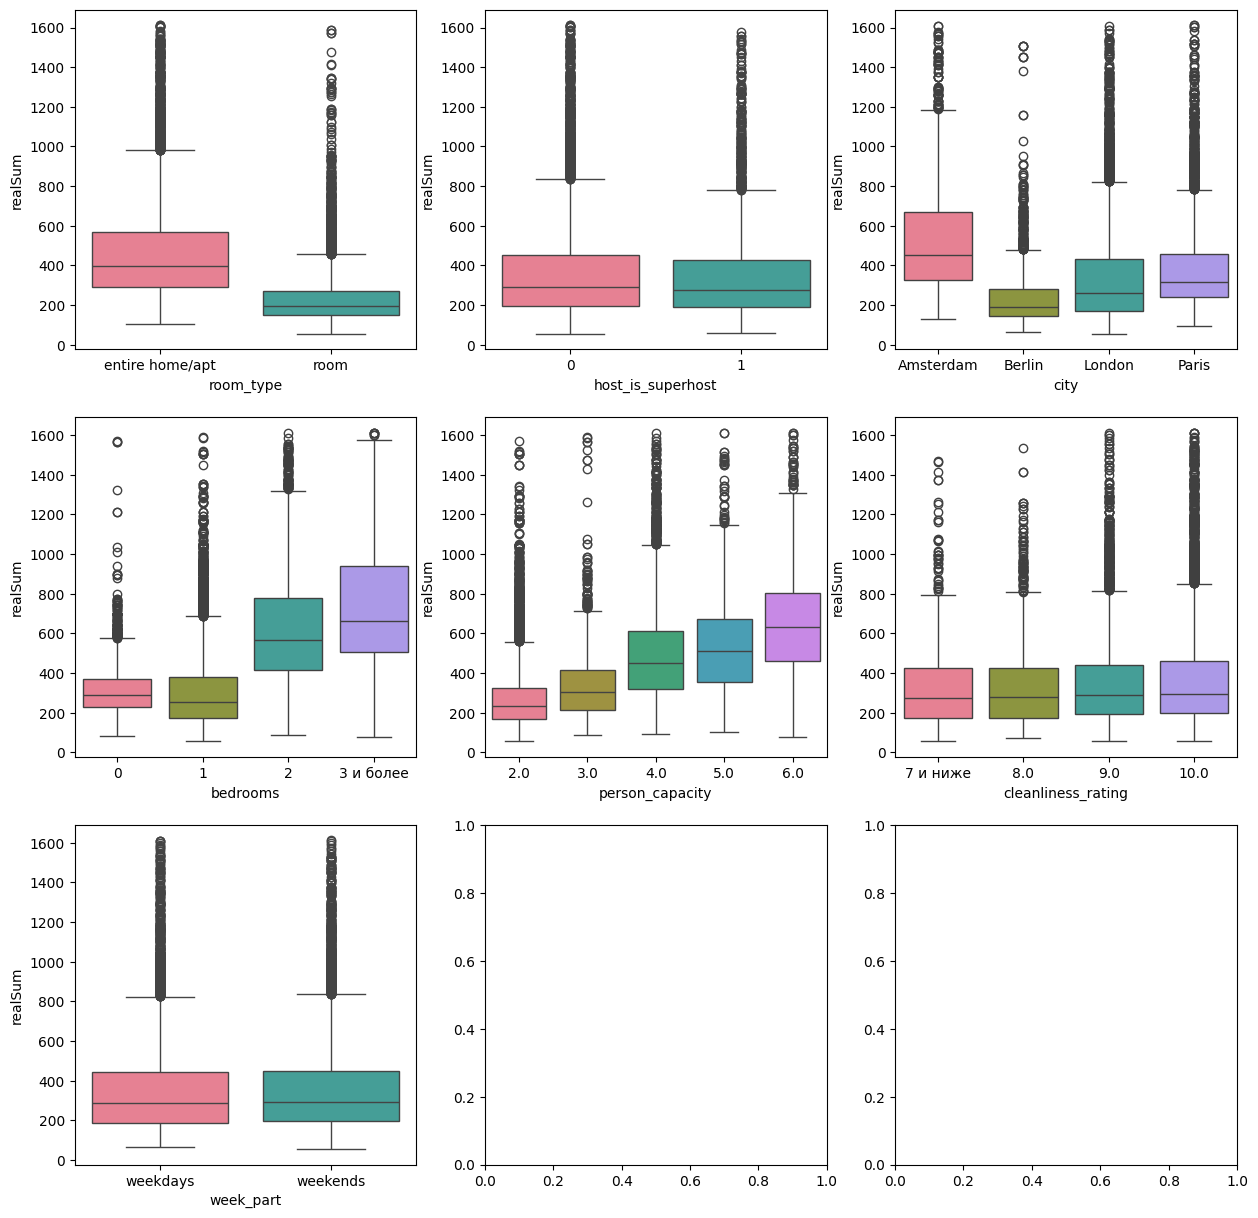

In [ ]:
categorical_column_subset = ['room_type', 'host_is_superhost', 'city', 'bedrooms', 'person_capacity', 'cleanliness_rating', 'week_part']

count = 0

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for row in range(3):
    for col in range(3):
        if count < len(categorical_column_subset):
              sns.boxplot(x = categorical_column_subset[count], y = 'realSum', data = filtered_data, ax = axes[row, col], palette = 'husl')
              count += 1
        else:
            break

Видим, что для разных типов размещения, количества спален, городов и вместимостей медиана цен достаточно сильно отличается. Для остальных переменных она также находится на разных уровнях, но различия по категориям гораздо менее заметны.

**Задание 9 (1 балл).**

Давайте снова формализуем наши выводы из прошлого задания - примените тест Крускала, и не забудьте о статзначимости.

Воспользуйтесь реализацией из *scipy.stats*.

Согласуется ли результат с вашими выводами?


In [ ]:
from scipy.stats import kruskal

def calculate_kruskal_test(groups, column):
    statistics = kruskal(*groups)
    print(f'{column} \t {statistics}')


for column in categorical_column_subset:
    grouped_realSums = []
    for title, group in filtered_data.groupby(column):
        grouped_realSums.append(group['realSum'].values)

    calculate_kruskal_test(grouped_realSums, column)

room_type 	 KruskalResult(statistic=7939.607133614603, pvalue=0.0)
host_is_superhost 	 KruskalResult(statistic=6.364782833248741, pvalue=0.011640734117853822)
city 	 KruskalResult(statistic=2758.765690114094, pvalue=0.0)
bedrooms 	 KruskalResult(statistic=4314.159653358349, pvalue=0.0)
person_capacity 	 KruskalResult(statistic=5838.950092149224, pvalue=0.0)
cleanliness_rating 	 KruskalResult(statistic=61.367791992833425, pvalue=2.998990729016461e-13)
week_part 	 KruskalResult(statistic=9.169115554087488, pvalue=0.0024613349167137747)


* p-value < alpha (берем уровень значимости, равный 0.05) для всех категориальных переменных => для этих переменных нулевая гипотеза о равенстве медиан отклоняется => цена за съем жилья тем или иным образом зависит от категориальных признаков;

* Наши выводы из предыдущего пункта подтвердились: для переменных room_type, city, bedrooms, person_capacity рассчитанные статистики исчисляются тысячами, для всех остальных в большинстве своем не превышают 10.

## Часть 3. Доверительные интервалы и тесты

Точечные оценки средних - это неплохой источник информации, но даже по диаграммам выше мы видим, что разброс цен от среднего на самом деле бывает очень разным.

Давайте построим несколько интервальных оценок - так, есть две формулы для доверительных интервалов для среднего:

1. асимтотический доверительный интервал (z-интервал)

$$\theta \in \bigg(\overline{X}-\frac{S}{\sqrt{n}}z_{(1+\alpha)/2},\ \overline{X}+\frac{S}{\sqrt{n}}z_{(1+\alpha)/2}\bigg)$$

2. точный неасимптотический (t-интервал)

$$\theta \in \bigg(\overline{X} - \frac{S}{\sqrt{n-1}}T_{n-1, (1+\alpha)/2},\ \overline{X} + \frac{S}{\sqrt{n-1}}T_{n-1, (1+\alpha)/2}\bigg)$$


Здесь $z_{\alpha}$ - это $\alpha$-квантиль нормального распределения, а $T_{n, \alpha}$ - это $\alpha$-квантиль распределения Стьюдента с $n$ степенями свободы.

**Задание 10 (2.5 балла).**
Сделайте функцию для построения обоих доверительных интервалов. Постройте с помощью неё доверительные интервалы для среднего, t-интервал визуализируйте на гистограмме распределения цен. Сильно ли они отличаются? Почему?

*Подсказка:* в пакете `statsmodels.stats.weightstats` есть функции `_zconfint_generic`, `_tconfint_generic` - можно использовать их для проверки.

In [ ]:
def confint(sample: pd.Series | np.ndarray,
            alpha: float = 0.05,
            int_type: str = 'asymptotic'
            ) -> tuple[float, float, float]:
    assert int_type in ('asymptotic', 'exact')

    if int_type == 'asymptotic':
      z = sps.norm.ppf(1 - alpha/2) # Например, (1 - 0.95)/2 = (1 + 1 - alpha(=0.05))/2 = (2 - alpha(=0.05))/2 = 1 - alpha(=0.05)/2
      left = sample.mean() - (sample.std()/np.sqrt(len(sample))) * z
      right = sample.mean() + (sample.std()/np.sqrt(len(sample))) * z

    elif int_type == 'exact':
      t = sps.t.ppf(1 - alpha/2, df = len(sample) - 1)
      left = sample.mean() - (sample.std()/np.sqrt(len(sample) - 1)) * t
      right = sample.mean() + (sample.std()/np.sqrt(len(sample) - 1)) * t

    return left, right

In [ ]:
print('Асимптотический доверительный интервал для среднего:')
print(confint(filtered_data['realSum'], 0.05, 'asymptotic'))
print('Точный неасимптотический доверительный интервал для среднего:')
print(confint(filtered_data['realSum'], 0.05, 'exact'))

Асимптотический доверительный интервал для среднего:
(352.8386115326359, 359.1452368310129)
Точный неасимптотический доверительный интервал для среднего:
(352.83835542616896, 359.14549293747984)


In [ ]:
import statsmodels.stats.weightstats
from statsmodels.stats.weightstats import _tconfint_generic, _zconfint_generic

print('Асимптотический доверительный интервал для среднего:')
print(statsmodels.stats.weightstats._zconfint_generic(filtered_data['realSum'].mean(),
                                                filtered_data['realSum'].std()/np.sqrt(len(filtered_data['realSum'])),
                                                0.05,
                                                alternative = 'two-sided'))

print('Точный неасимптотический доверительный интервал для среднего:')
print(statsmodels.stats.weightstats._tconfint_generic(filtered_data['realSum'].mean(),
                                                filtered_data['realSum'].std()/np.sqrt(len(filtered_data['realSum']) - 1),
                                                dof = len( filtered_data['realSum']) - 1,
                                                alpha = 0.05,
                                                alternative = 'two-sided'))

Асимптотический доверительный интервал для среднего:
(352.8386115326359, 359.1452368310129)
Точный неасимптотический доверительный интервал для среднего:
(352.83835542616896, 359.14549293747984)


z-интервалы и t-интервалы отличаются незначительно, так как у нас достаточно много наблюдений => по ЦПТ распределение стремится к нормальному.

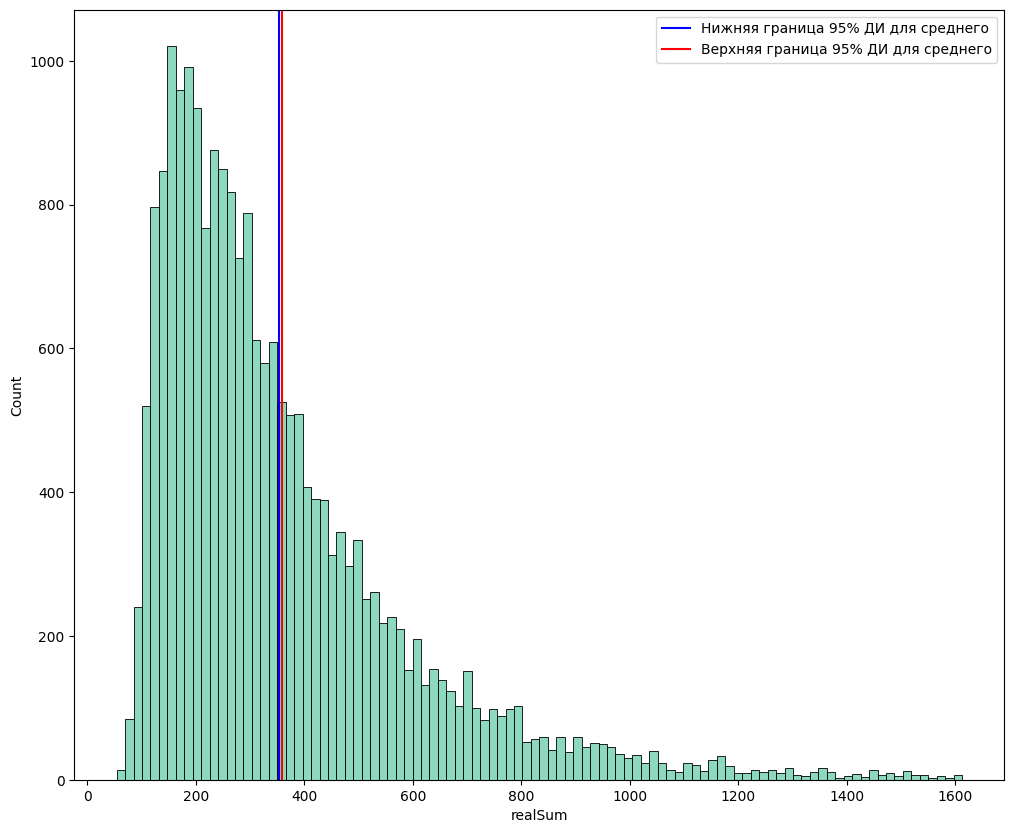

In [ ]:
plt.figure(figsize=(12, 10))
sns.histplot(filtered_data['realSum'], bins=100, color = 'mediumaquamarine')

ci = confint(filtered_data['realSum'], int_type='exact', alpha=0.05)
plt.axvline(x = ci[0], color='blue', label = 'Нижняя граница 95% ДИ для среднего')
plt.axvline(x = ci[1], color='red', label = 'Верхняя граница 95% ДИ для среднего')
plt.legend()

plt.show()

**Задание 11 (0.5 балла).**
Постройте доверительные интервалы с уровнем доверия 0.95 для средней цены для бронирований в выходные и будни - у вас получится две подвыборки и два интервала.


In [ ]:
print('Точный неасимптотический ДИ для средней цены бронирований в будние дни:')
print(confint(filtered_data[filtered_data['week_part'] == 'weekdays']['realSum'], int_type='exact', alpha=0.05))
print('Точный неасимптотический ДИ для средней цены бронирований в выходные дни:')
print(confint(filtered_data[filtered_data['week_part'] == 'weekends']['realSum'], int_type='exact', alpha=0.05))

Точный неасимптотический ДИ для средней цены бронирований в будние дни:
(348.27337901730675, 357.41872805020694)
Точный неасимптотический ДИ для средней цены бронирований в выходные дни:
(354.505419040559, 363.2155881211721)


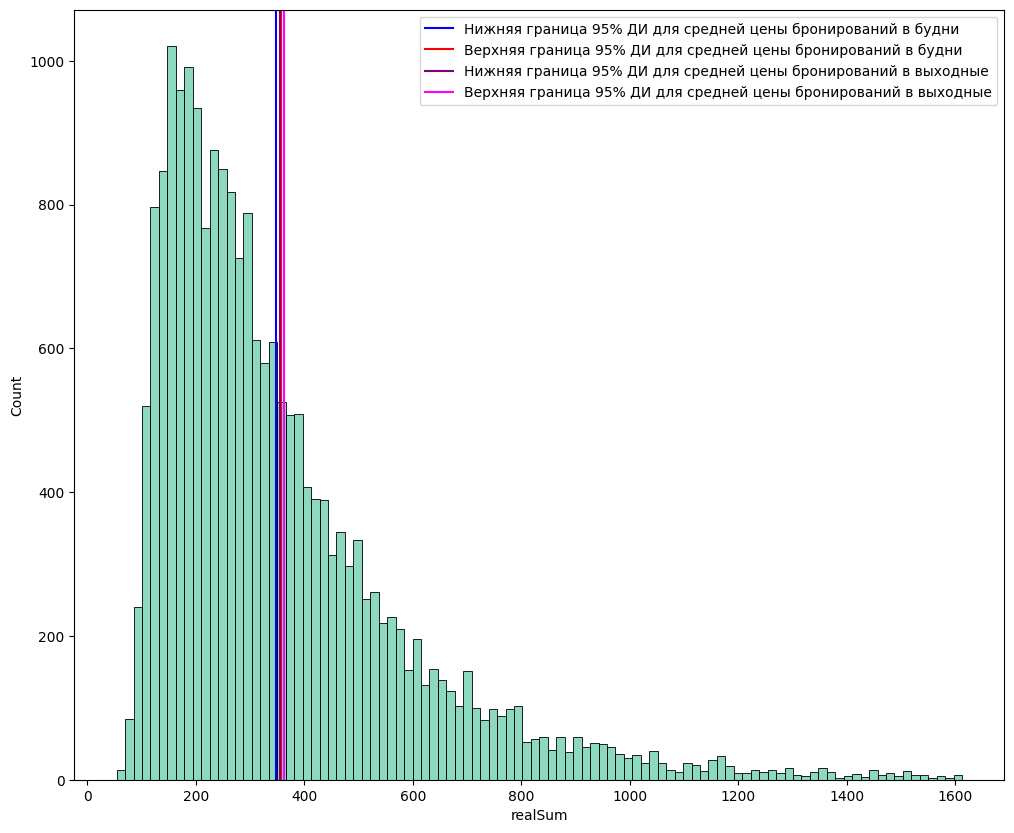

In [ ]:
plt.figure(figsize=(12, 10))
sns.histplot(filtered_data['realSum'], bins=100, color = 'mediumaquamarine')

ci = [confint(filtered_data[filtered_data['week_part'] == 'weekdays']['realSum'], int_type ='exact', alpha=0.05),
      confint(filtered_data[filtered_data['week_part'] == 'weekends']['realSum'], int_type ='exact', alpha=0.05)]

plt.axvline(x = ci[0][0], color ='blue', label = 'Нижняя граница 95% ДИ для средней цены бронирований в будни')
plt.axvline(x = ci[0][1], color ='red', label = 'Верхняя граница 95% ДИ для средней цены бронирований в будни')
plt.axvline(x = ci[1][0], color ='purple', label = 'Нижняя граница 95% ДИ для средней цены бронирований в выходные')
plt.axvline(x = ci[1][1], color ='fuchsia', label = 'Верхняя граница 95% ДИ для средней цены бронирований в выходные')
plt.legend()

plt.show()

Видим, что доверительные интервалы пересекаются => можно говорить о том, что выявленное различие статистически незначимо, нет оснований, чтобы отвергнуть нулевую гипотезу о равенстве средних для двух подвыборок.

**Задание 12 (2 балла).**
Для проверки различных гипотез часто используют статистические тесты.
Давайте воспользуемся одним из них, а именно Т-тестом Стьюдента.

Для начала проведите "А/А тест", чтобы убедиться, что для нашего распределения этот статистический тест подходит:
* Сгененерируйте случайные подвыборки из распределения цен
* Примените к ним Т-тест, сохраните получившийся `pvalue`
* Проведите такой эксперимент много раз.

Так мы получим результаты сравнения двух случайных выборок из одного распределения - значит нулевая гипотеза не должна отвергаться.
Мы можем проверить это следующим образом:
* Выберем уровень ошибки первого рода $\alpha$, он же трешхолд для p-value в наших экспериментах.
* При проведении теста, если все предположения о данных выполнены (вспомните, какие есть предположения о данных у Т-теста?), мы должны получать p-value < $\alpha$ только в $\alpha$ случаев.
* Мы можем отрисовать эмпирическую функцию распределения результатов и посмотреть, выполняется ли это для всех $\alpha$ - должна получиться примерно прямая линия из `(0, 0)` в `(1, 1)`.

Мы оставляем для вас функцию отрисовывания кривой по массиву с p-value из экспериментов, остальное - на вас! Можете провести разное количество экспериментов с разным размером выборки, чтобы убедиться, что тест подходит.

In [ ]:
def plot_cdf(data):
    sorted_data = np.sort(data)
    position = sps.rankdata(sorted_data, method='ordinal')
    cdf = position / data.shape[0]

    sorted_data = np.hstack((sorted_data, 1))
    cdf = np.hstack((cdf, 1))

    plt.plot(sorted_data, cdf, linestyle='solid', color = 'fuchsia')
    plt.grid()
    plt.title('A/A: p-value CDF under H0')
    plt.show()

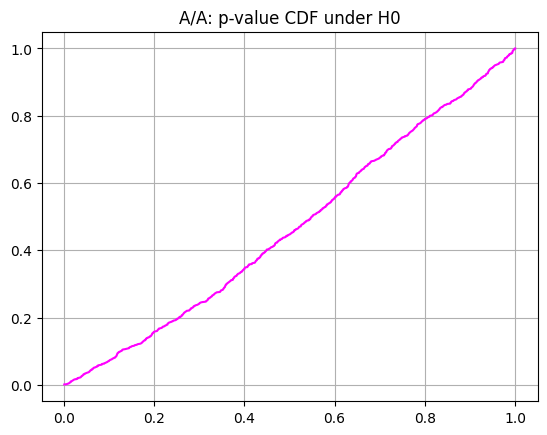

In [ ]:
pvalues = []
np.random.seed(42)
n_experiments = 1000
n_subset = 3000

for n in range(n_experiments):
    sample_1 = np.random.choice(filtered_data['realSum'], size = n_subset, replace = False)
    sample_2 = np.random.choice(filtered_data['realSum'], size = n_subset, replace = False)

    n, p_value = sps.ttest_ind(sample_1, sample_2)

    pvalues.append(p_value)

plot_cdf(np.array(pvalues))

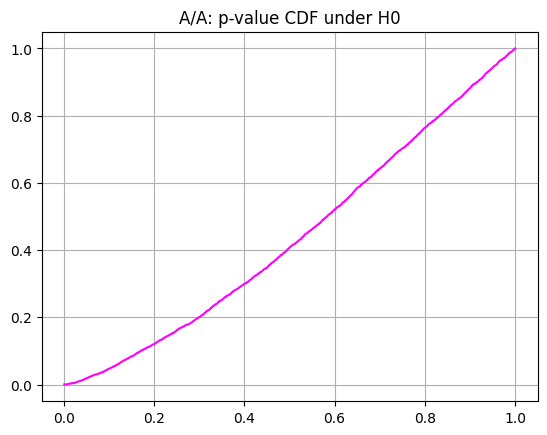

In [ ]:
pvalues = []
np.random.seed(117)
n_experiments = 5000
n_subset = 7000

for n in range(n_experiments):
    sample_1 = np.random.choice(filtered_data['realSum'], size = n_subset, replace = False)
    sample_2 = np.random.choice(filtered_data['realSum'], size = n_subset, replace = False)

    n, p_value = sps.ttest_ind(sample_1, sample_2)

    pvalues.append(p_value)

plot_cdf(np.array(pvalues))

Отлично, мы можем пользоваться Т-тестом Стьюдента! Давайте применим его и сравним:
* цены у обычных хозяев и у суперхозяев
* цены на квартиры и на отдельные комнаты

Можете также построить boxplot-ы и доверительные интервалы, если хотите.

До проведения теста напишите, какие по вашему мнению будут результаты и почему?

**Ответ:** Можно предположить, что средние на цены у супер хозяев и обычных хозяев не будут сильно отличаться, так как арендаторы смотрят прежде всего на рейтинги, расстояния и тд, и им почти всегда не очень важен статус хозяина, если жилье их устраивает по более весомым параметрам. Цены на квартиры и отдельные комнаты, вероятно, будут отличаться, так как в квартирах есть все удобства (кухня и тд), возможности в отдельных комнатах сильно ограничены, там, как правило, предусмотрено только спальное место и санузел, что вынуждает туристов дополнительно тратиться на еду и уменьшает сумму, которую они готовы отдать за аренду.

In [ ]:
filtered_data['room_type'].unique().tolist(), filtered_data['host_is_superhost'].unique().tolist()

(['room', 'entire home/apt'], [0, 1])

In [ ]:
sps.ttest_ind(filtered_data[filtered_data['host_is_superhost'] == 1]['realSum'], filtered_data[filtered_data['host_is_superhost'] == 0]['realSum'])

TtestResult(statistic=-0.8266112916308805, pvalue=0.4084667805726878, df=21059.0)

In [ ]:
sps.ttest_ind(filtered_data[filtered_data['room_type'] == 'entire home/apt']['realSum'], filtered_data[filtered_data['room_type'] == 'room']['realSum'])

TtestResult(statistic=82.84285784484017, pvalue=0.0, df=21059.0)

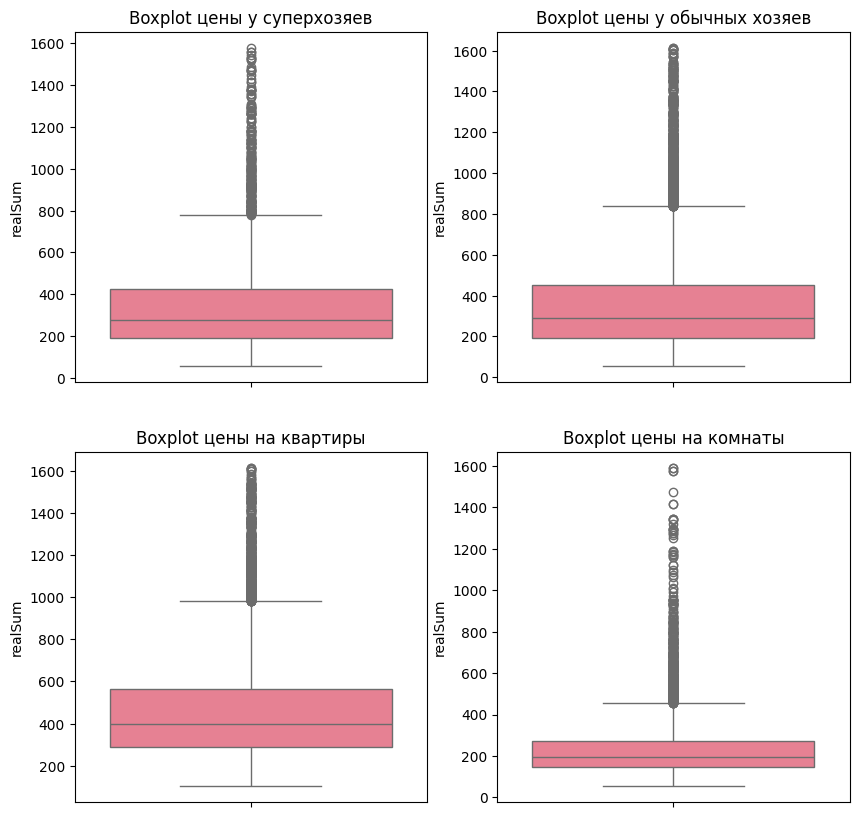

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
axs[0] = plt.subplot(221)
plt.title('Boxplot цены у суперхозяев')
sns.boxplot(filtered_data[filtered_data['host_is_superhost'] == 1]['realSum'], palette = 'husl')
axs[1] = plt.subplot(222)
plt.title('Boxplot цены у обычных хозяев')
sns.boxplot(filtered_data[filtered_data['host_is_superhost'] == 0]['realSum'], palette = 'husl')
axs[2] = plt.subplot(223)
plt.title('Boxplot цены на квартиры')
sns.boxplot(filtered_data[filtered_data['room_type'] == 'entire home/apt']['realSum'], palette = 'husl')
axs[3] = plt.subplot(224)
plt.title('Boxplot цены на комнаты')
sns.boxplot(filtered_data[filtered_data['room_type'] == 'room']['realSum'], palette = 'husl');


 Наши предположения подтвердились:

 * p-value для подвыборок realSum по категориям host_is_superhost (0.4) больше минимального уровня значимости (0.05) => нет основания отвергнуть нулевую гипотезу о равенстве средних для двух подвыборок;

 * p-value для подвыборок realSum по категориям room_type (0.00) меньше минимального уровня значимости (0.05) => нулевая гипотеза о равенстве средних двух подвыборок отвергается.

## Часть 4. Бонус

**Задание 13 (0.5 балла).**

По желанию сделайте любые дополнительные тесты и визуализации, а затем напишите, какие выводы и гипотезы можно сделать из наших исследований.
- Что из исследованных переменных значимо влияет на цену бронирования?
- Что происходит при росте расстояния до ближайшего метро?
- Можно ли выделить полезную информацию из оценок чистоты? Почему так могло получиться?
- **И главный вопрос: в какой город лучше поехать отдыхать?**


In [ ]:
filtered_data.describe()

,Unnamed: 0,realSum,host_is_superhost,guest_satisfaction_overall,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000
mean,1834.439343,355.991924,0.176297,91.861260,4.352854,0.751458,294.379682,18.651166,600.751720,24.783124,2.735908,50.871898
std,1378.180199,233.484705,0.381082,9.907824,2.741632,1.071604,177.187004,10.508217,383.319466,18.790060,4.207131,1.411234
min,0.000000,54.328653,0.000000,20.000000,0.015045,0.003220,15.152201,2.164941,19.576924,2.515094,-0.251700,48.819940
25%,665.000000,193.325337,0.000000,89.000000,2.403240,0.214577,170.350089,11.686098,333.246209,9.293996,-0.112570,48.880540
50%,1518.000000,289.635567,0.000000,95.000000,3.910381,0.379105,263.190574,16.108795,540.639471,18.124907,2.292970,51.496190
75%,2841.000000,446.388673,0.000000,99.000000,5.623724,0.766012,383.191159,23.070427,807.945997,36.257971,2.382930,51.546530
max,5378.000000,1612.685246,1.000000,100.000000,25.284557,14.273577,2056.552199,100.000000,5587.136047,100.000000,13.711850,52.641410


Решила построить модель классификации, чтобы посмотреть, какие признаки больше всего влияют на выбор города для отдыха.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Перекодируем категориальные переменные в дамми, чтобы модель могла их обработать
# В качестве таргета берем переменную city
model_data = pd.get_dummies(filtered_data.drop('city', axis = 1), drop_first = True)
model_data

,Unnamed: 0,realSum,host_is_superhost,guest_satisfaction_overall,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,...,person_capacity_4.0,person_capacity_5.0,person_capacity_6.0,cleanliness_rating_8.0,cleanliness_rating_9.0,cleanliness_rating_10.0,bedrooms_1,bedrooms_2,bedrooms_3 и более,week_part_weekends
0,0.0,194.033698,0,93.0,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,...,0,0,0,0,0,1,1,0,0,0
1,1.0,344.245776,0,85.0,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,...,1,0,0,1,0,0,1,0,0,0
2,2.0,264.101422,0,87.0,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,...,0,0,0,0,1,0,1,0,0,0
3,3.0,433.529398,0,90.0,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,...,1,0,0,0,1,0,0,1,0,0
4,4.0,485.552926,1,98.0,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,1279.0,232.074413,0,96.0,3.482221,0.509602,91.587227,13.964286,122.168375,25.190282,...,0,0,0,0,0,1,1,0,0,0
21241,1280.0,175.049079,0,100.0,11.002848,2.377031,34.425382,5.248831,44.454457,9.166205,...,0,0,0,0,0,1,1,0,0,0
21242,1281.0,158.689352,0,91.0,11.313156,2.531878,33.429196,5.096943,43.200491,8.907645,...,0,0,0,0,1,0,1,0,0,0
21243,1282.0,134.617182,0,93.0,15.166191,2.754843,25.439056,3.878688,33.027075,6.809957,...,1,0,0,0,0,1,1,0,0,0


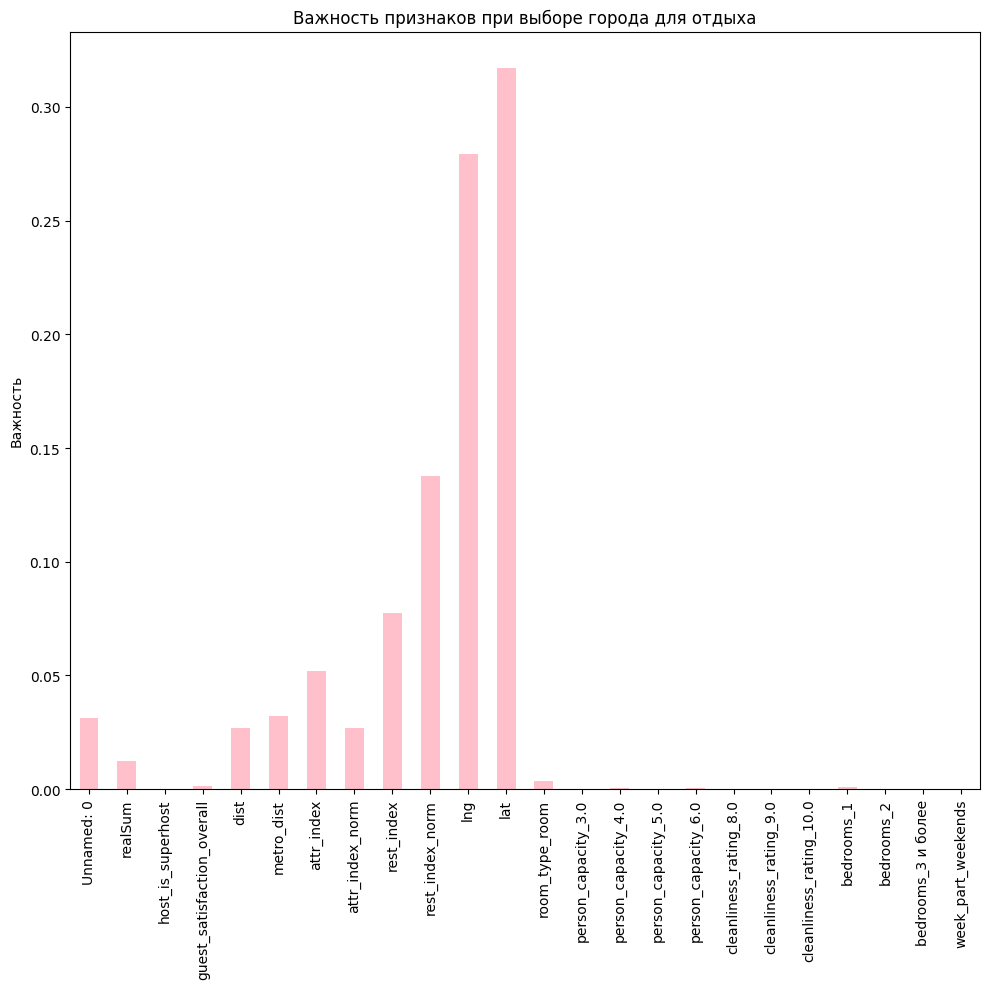

In [ ]:
model = RandomForestClassifier()
model.fit(X = model_data, y = filtered_data['city'])

features = pd.Series(model.feature_importances_,
                         model_data.columns)

fig, ax = plt.subplots(figsize=(10,10))
features.plot.bar(ax=ax, color = 'pink')
ax.set_title("Важность признаков при выборе города для отдыха")
ax.set_ylabel('Важность')
fig.tight_layout()

Модель определила, что наиболее важными признаками при выборе города для отдыха являются dist, metro_dist, attr_index и rest_index_norm (долготу и широту не рассматриваем, так как, если туристы хотят поехать в какой-то определенный город, его координаты, очевидно, будут для них наиболее значимы). Это логично, так как туристы в первую очередь действительно смотрят на пешую и транспортную доступность центров городов, где, в основном, располагаются ключевые достопримечательности, а также различные рейтинги. Особенно важны ресторанные рейтинги, так как представленные города являются гастрономическими центрами.

In [ ]:
# Посмотрим, какой из городов получил больше всего оценок "отлично: 80-100" в ресторанном рейтинге
filtered_data[(filtered_data['rest_index_norm'] >= 80) & (filtered_data['rest_index_norm'] <= 100)]['city'].value_counts()

Paris        104
Berlin        40
Amsterdam     10
London         2
Name: city, dtype: int64

In [ ]:
# Посмотрим, какой из городов получил больше всего максимальных оценок в рейтинге привлекательности
filtered_data[filtered_data['attr_index'] == filtered_data['attr_index'].max()]['city']

5837    Paris
Name: city, dtype: category
Categories (4, object): ['Amsterdam', 'Berlin', 'London', 'Paris']

In [ ]:
# Посмотрим, в каком из городов минимальные расстояния до центра города
filtered_data[filtered_data['dist'] == filtered_data['dist'].min()]['city'].value_counts().index[0]

'Amsterdam'

In [ ]:
# Посмотрим, в каком городе минимальные расстояния до метро
filtered_data[filtered_data['metro_dist'] == filtered_data['metro_dist'].min()]['city'].value_counts().index[0]

'Paris'

В 3 из 4 выделенных моделью ключевых признаков лидирующие позиции занимает Париж, поэтому мы можем назвать его лучшим городом для отдыха.

Построили матрицу корреляций по коэффициенту Кендалла, чтобы посмотреть, какие переменные связаны с ценой бронирования.

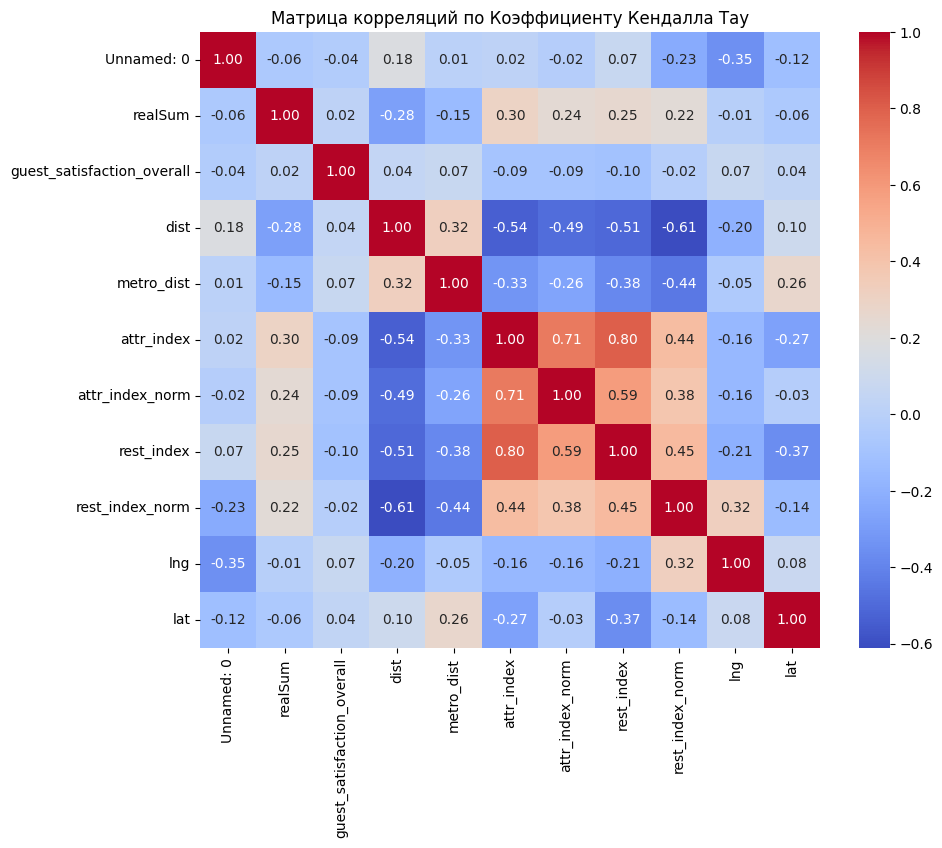

In [ ]:
# Вычисление матрицы корреляций по коэффициенту Кендалла
kendall_correlation_matrix = filtered_data[numerical_columns].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(kendall_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций по Коэффициенту Кендалла Тау')
plt.show()

**Ответ:** Видим, что наиболее сильная положительная связь с ценой размещения наблюдается у индексов привлекательности и ресторанных рейтингов, а отрицательная - у расстояний до центра и метро. Однако о причинно-следственной связи судить мы не можем, так как коэффициент корреляции показывает только меру линейной связи между значениями переменных.
